In [5]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
# Import the data of the scenario 1 and the optimization function (netopt)
# Press shift + enter in each cell to run the commands, or click on Run in the command bar
# v1.3 - 2024-04-04

from netopt import netopt, print_solution, plot_map
from data.scenario_6 import warehouses, customers
from data_structures import show_data, show_geo_map, calculate_dm

In [94]:
distance = calculate_dm(warehouses, customers, use_haversine=True)

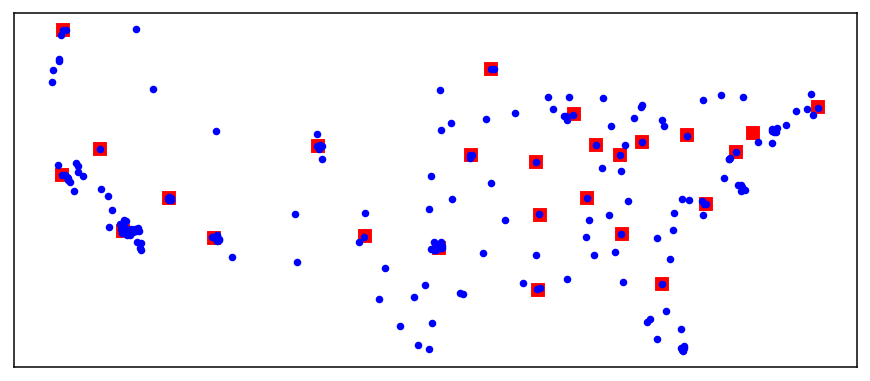

In [83]:
# Plot the data
# You can control the colors and shapes in the plot using the following parameters (also in the netopt function):
# - warehouse_marker=shape of the warehouse icons. Allowed values are s=square, o=circle, *=star, ^=triangle, v=inverted triangle. Default is s
# - warehouse_markercolor=color of the warehouse icons. Allowed values are red, green, blue, black, yellow. Default is red
# - warehouse_markersize=size of the warehouse icons. Default is 4
# - warehouse_active_markersize=size of the warehouse icons representing active (open) warehouses. Default is 5
# - customer_marker=shape of the customer icons. Default is o
# - customer_markercolor=color of the customer icons. Default is blue
# - customer_markersize=size of the customer icons. Default is 4
# If you don't specify the above parameters about the figures, the default values will be assumed

plot_map(customers=customers,
         warehouses=warehouses,
         warehouse_marker='s',
         warehouse_markercolor='red',
         warehouse_markersize=6,
         customer_marker='o',
         customer_markercolor='blue',
         customer_markersize=3)

In [4]:
show_geo_map(customers=customers, warehouses=warehouses, zoom=4)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 5.0

Open warehouses:
ID:   8 City: Dallas               State: TX     Num. customers:  61  Outflow:  21388018.0 units
ID:   3 City: Baltimore            State: MD     Num. customers:  71  Outflow:  32750910.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  68  Outflow:  23887405.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 14.24891415788364
Average customers distance (no weights): 5.843774046179918


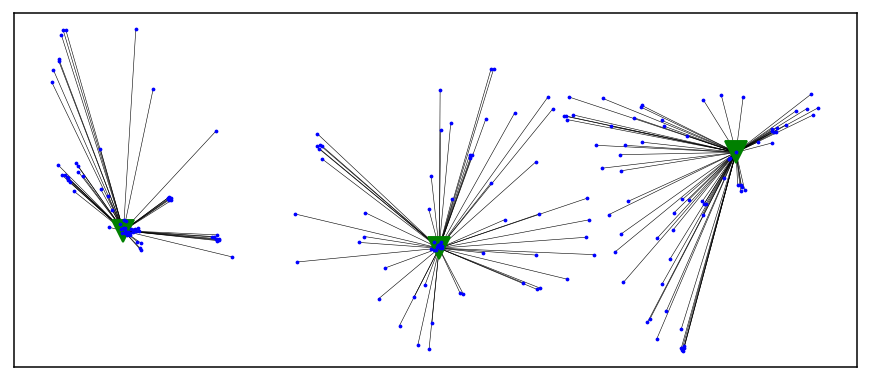

In [84]:
# Get the optmimal location of num_warehouses warehouses.
# You can change the value of parameter num_warehouses to test different scenario.
# The parameter warehouses, customers, and distance are loaded in the previous cell.
# You must define the objective: the objective mindistance minimizes the average weighted distance.
# By setting the parameter plot to True, the function returns a simplyfied picture of the solution along with a summary of the performance. 
# If you don't want the picture, set plot to False.
# If you set hide_inactive to True the plot would not show inactive warehouses.
# Outflow in the results represents the quantity exiting from each warehouse.


results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 146.0

Open warehouses:
ID:   1 City: Allentown            State: PA     Num. customers:  15  Outflow:  13248371.0 units
ID:   2 City: Atlanta              State: GA     Num. customers:   8  Outflow:   1936930.0 units
ID:   4 City: Boston               State: MA     Num. customers:   5  Outflow:   1481189.0 units
ID:   5 City: Chicago              State: IL     Num. customers:   9  Outflow:   4682553.0 units
ID:   7 City: Columbus             State: OH     Num. customers:   8  Outflow:   3178702.0 units
ID:   8 City: Dallas               State: TX     Num. customers:  21  Outflow:  10114723.0 units
ID:   9 City: Denver               State: CO     Num. customers:   6  Outflow:   1746913.0 units
ID:  10 City: Indianapolis         State: IN     Num. customers:   6  Outflow:   2575378.0 units
ID:  11 City: Jacksonville         State: FL     Num. customers:  13  Outflow:   3394939.0 units
I

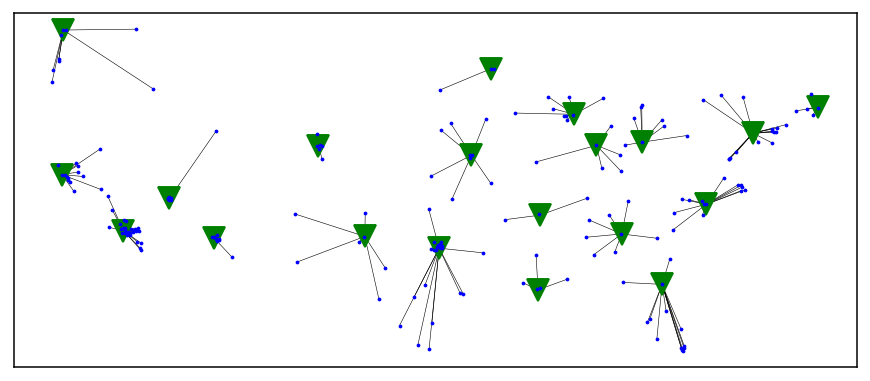

In [95]:
# By adding the parameter distance_ranges the functions returns the % of the demand
# within the passed distance ranges. For example, if distance_ranges = [0, 100, 200]
# the functions return the percentage of demand in the ranges [0, 100], (100, 200], (200, 99999]
# where 99999 is used to represent a very long distance (i.e. infinite distance).
# By changing the parameter num_warehouses and distance_ranges you can test different scenarios.
# The parameter distance_ranges must be a list of increasing numbers. If you do not pass 0 as the first value
# it will be automatically added

results = netopt(num_warehouses=20,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

In [96]:
# The results variable contains a summary of the optimization report
print(results)

{'objective_value': 145.6169971251241, 'avg_weighted_distance': 145.616997125124, 'active_warehouses_id': {1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 23, 24, 26}, 'active_warehouses_name': ['Allentown', 'Atlanta', 'Boston', 'Chicago', 'Columbus', 'Dallas', 'Denver', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Los Angeles', 'Memphis', 'Minneapolis', 'New Orleans', 'Phoenix', 'Raleigh', 'San Francisco', 'Seattle', 'Lubbock - Current WH'], 'most_distant_customer': 765.375830506332, 'demand_perc_by_ranges': {(0, 100): 0.4558389281218688, (100, 400): 0.4747904018506163, (400, 800): 0.06937067002751494, (800, 3200): 0.0, (3200, 99999): 0.0}, 'avg_customer_distance': 164.0365339094097, 'multi_sourced_customers': [], 'customers_assignment': [{'Warehouse': 'Allentown', 'Warehouse_id': 1, 'Customer': 'Alexandria', 'Customer_id': 3, 'Customer Demand': 147786, 'Distance': 241.83918430658306, 'Warehouse Latitude': 40.602812, 'Warehouse Longitude': -75.470433, 'Cus

In [86]:
# For a slightly better visualization of the results use print_solution as follows
print_solution(results)

{   'active_warehouses_id': {   1,
                                2,
                                4,
                                5,
                                7,
                                8,
                                9,
                                10,
                                11,
                                12,
                                13,
                                14,
                                15,
                                16,
                                18,
                                19,
                                21,
                                23,
                                24,
                                26},
    'active_warehouses_name': [   'Allentown',
                                  'Atlanta',
                                  'Boston',
                                  'Chicago',
                                  'Columbus',
                                  'Dallas',
               

CHECK INPUTS...OK
BUILD MODEL...Forcing open warehouses: [1]
Forcing closed warehouses: [8, 3]
OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 549.0

Open warehouses:
ID:   1 City: Allentown            State: PA     Num. customers:  41  Outflow:  21562167.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  76  Outflow:  26802103.0 units
ID:  15 City: Memphis              State: TN     Num. customers:  83  Outflow:  29662063.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 13.7
% of demand in range   100 -   400: 24.2
% of demand in range   400 -   800: 42.0
% of demand in range   800 -  3200: 20.1
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1555.5454338274894
Average customers distance (no weights): 613.0400019894345


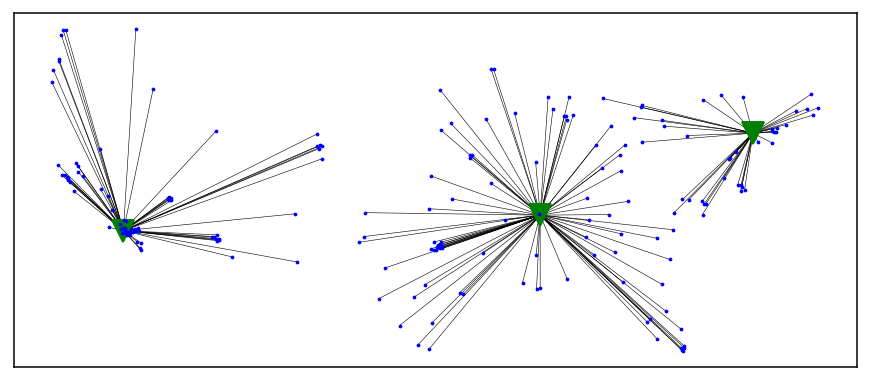

In [107]:
# It is also possible to force warehouses to be open (for example, to force using the current warehouse)
# of closed (to avoid the selection of some candidate).
# The warehouses are references through their id, and must be passed as list [] (even for a single value, that is
# to force closed the warehouse with id 1 you should pass force_closed=[1])


results = netopt(num_warehouses=3,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[1],
                 force_closed=[8, 3],
                 distance_ranges=[0, 100, 400, 800, 3200],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

In [ ]:
# The id of the warehouses is the value on the left of the colon in the warehouses python variable

print_solution(warehouses)

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
% covered demand within 800 distance: 95.9%

Open warehouses:
ID:   1 City: Allentown            State: PA     Num. customers:  36  Outflow:  19489316.0 units
ID:  11 City: Jacksonville         State: FL     Num. customers:  24  Outflow:   6419934.0 units
ID:  13 City: Las Vegas            State: NV     Num. customers:  68  Outflow:  23887405.0 units
ID:  25 City: St. Louis            State: MO     Num. customers:  37  Outflow:  13576202.0 units
ID:  26 City: Lubbock              State: TX     Num. customers:  35  Outflow:  14653476.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 6.3
% of demand in range   100 -   400: 35.6
% of demand in range   400 -   800: 53.9
% of demand in range   800 -  3200: 4.1
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1625.9608476350618
Average customers distance (no weights): 489.1687195534894
PLOTTING RADIUS 800...


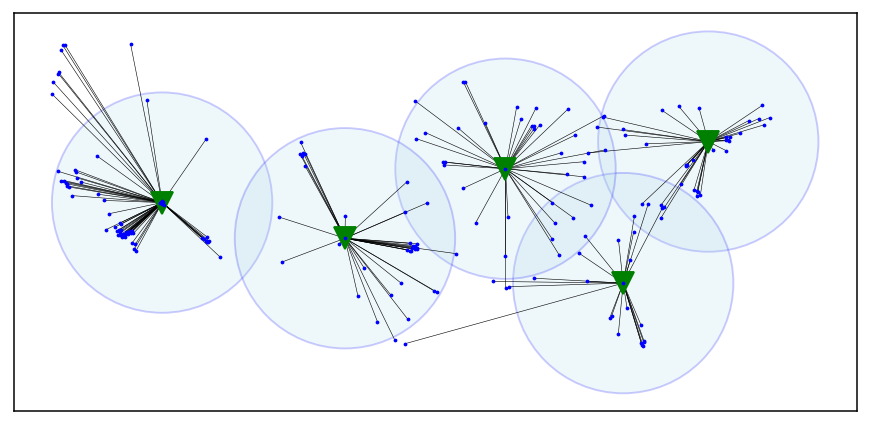

In [108]:
# The objective maxcover maximises the % of demand within a distance specified
# by the high_service_distance parameter. If you set the objective to maxcover and don't specify the
# high_service_distance parameter you'll get an error.

results = netopt(num_warehouses=5,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,
                 avg_service_distance=700,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

#print_solution(results)


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
% covered demand within 800 distance: 84.5%

Open warehouses:
ID:   8 City: Dallas               State: TX     Num. customers:  49  Outflow:  18149296.0 units
ID:  13 City: Las Vegas            State: NV     Num. customers:  74  Outflow:  25333222.0 units
ID:   7 City: Columbus             State: OH     Num. customers:  77  Outflow:  34543815.0 units

Total outflow: 78026333.0 units
% of demand in range     0 -   100: 8.2
% of demand in range   100 -   400: 24.1
% of demand in range   400 -   800: 52.2
% of demand in range   800 -  3200: 15.5
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 1765.3052304228265
Average customers distance (no weights): 605.1662044206541
PLOTTING RADIUS 800...


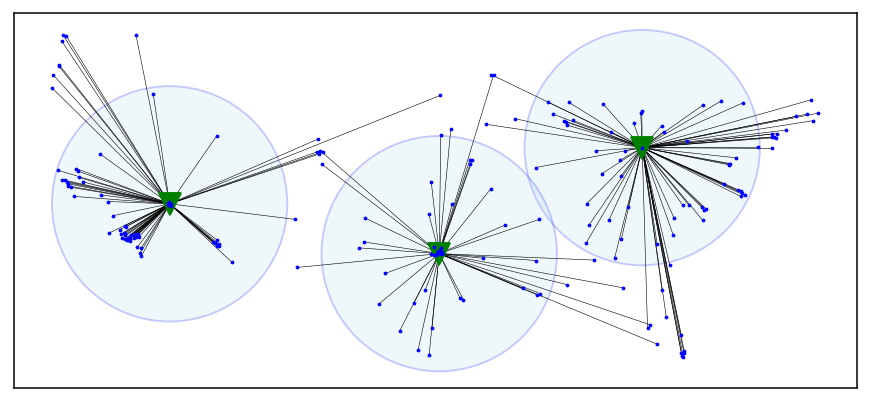

In [104]:
# To limit the effect of random allocations of customers not contributing to the maxcover objective
# you can set the avg_service_distance in order to limit the avg weighted distance.
# Be careful: if avg_service_distance is too tight, it may results in a worse % of covered demand

results = netopt(num_warehouses=3,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,
                 avg_service_distance=800,
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

#print_solution(results)


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Infeasible
********* ERROR: Model not feasible, don't use results.
% covered demand within 800 distance: 81.8%

Open warehouses:
ID:  17 City: Nashville            State: TN     Num. customers:  92  Outflow:  38867786.0 units
ID:  26 City: Lubbock              State: TX     Num. customers:  41  Outflow:  16901137.0 units
ID:  22 City: Reno                 State: NV     Num. customers:  62  Outflow:  20776221.0 units

Total outflow: 76545144.0 units
% of demand in range     0 -   100: 1.7
% of demand in range   100 -   400: 22.9
% of demand in range   400 -   800: 57.2
% of demand in range   800 -  3200: 18.2
% of demand in range  3200 - 99999: 0.0
Most distant customer is at 969
Average customers distance (no weights): 506.95
PLOTTING RADIUS 800...


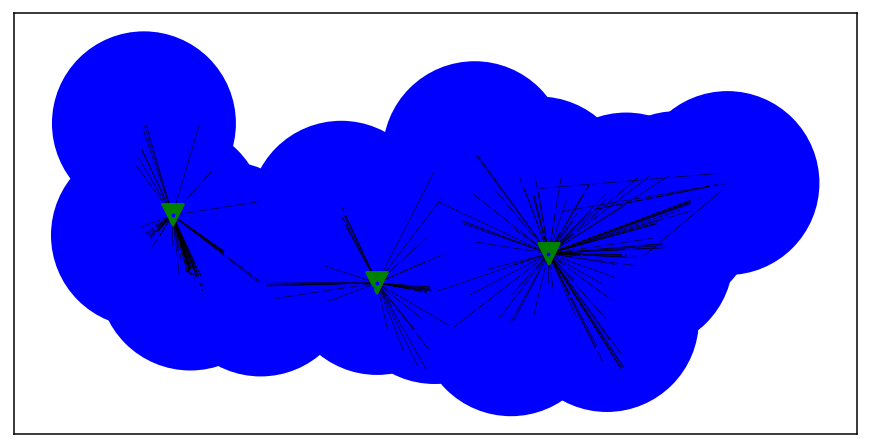

{   'active_warehouses_id': {17, 26, 22},
    'active_warehouses_name': ['Nashville', 'Lubbock - Current WH', 'Reno'],
    'avg_customer_distance': 506.95,
    'avg_weighted_distance': 541.7586852505294,
    'customers_assignment': [   {   'Customer': 'Concord',
                                    'Customer Demand': 375134,
                                    'Customer_id': 77,
                                    'Customers Latitude': 43.2347496666667,
                                    'Customers Longitude': -71.5435606666667,
                                    'Distance': 969,
                                    'Warehouse': 'Chicago',
                                    'Warehouse Latitude': 41.88331,
                                    'Warehouse Longitude': -87.624713,
                                    'Warehouse_id': 5},
                                {   'Customer': 'Boston',
                                    'Customer Demand': 610407,
                                    

In [20]:
# To limit the distance of the most distant customer, you can use the paramater max_service_distance.
# Be careful: if max_service_distance is too tight, the model may become infeasible.

results = netopt(num_warehouses=3,
                 objective='maxcover',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 high_service_distance=800,  # R
                 avg_service_distance=1200,  # awd
                 max_service_distance=1017,  # B = maxdist
                 distance_ranges=[0, 100, 400, 800, 3200],
                 force_open=[],
                 force_closed=[],
                 plot=True,
                 hide_inactive=True,
                 warehouse_marker='s',
                 warehouse_markercolor='red',
                 warehouse_markersize=6,
                 warehouse_active_markersize=12,
                 customer_marker='o',
                 customer_markercolor='blue',
                 customer_markersize=1)

print_solution(results)

In [ ]:
# Feel free to play with the parameters. If you find any error, please report it to me.

In [105]:
# If you know a little bit of python (or you are willing to learn a little bit), 
# you can easily automate experiments.
# For example, compute the average weighted distance for several values of p

for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 force_closed=[],
                 plot=False)
    print()
    print(f"*** AVG WEIGHTED DISTANCE FOR p={p}: {results['avg_weighted_distance']} ***")
    print()


CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 1462.0

Open warehouses:
ID:  12 City: Kansas City          State: MO     Num. customers: 200  Outflow:  78026333.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 2427.185209302748
Average customers distance (no weights): 1456.942145583644

*** AVG WEIGHTED DISTANCE FOR p=1: 1462.4128074741018 ***

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 761.0

Open warehouses:
ID:   6 City: Cincinnati           State: OH     Num. customers: 120  Outflow:  50347487.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  80  Outflow:  27678846.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 1920.8670956722476
Average customers distance (no weights): 769.364789099606

*** AVG WEIGHTED DISTANCE FOR p=2: 

CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 1071.0

Open warehouses:
ID:  12 City: Kansas City          State: MO     Num. customers: 200  Outflow:  78026333.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 1778
Average customers distance (no weights): 1067.06
CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 557.0

Open warehouses:
ID:   6 City: Cincinnati           State: OH     Num. customers: 120  Outflow:  50347487.0 units
ID:  14 City: Los Angeles          State: CA     Num. customers:  80  Outflow:  27678846.0 units

Total outflow: 78026333.0 units
% of demand in range     0 - 99999: 100.0
Most distant customer is at 1407
Average customers distance (no weights): 563.2
CHECK INPUTS...OK
BUILD MODEL...OK
SOLVE...OK
Optimization Status  Optimal
Average weighted distance: 383.0

Open warehouses:
ID:   8 City: Dall

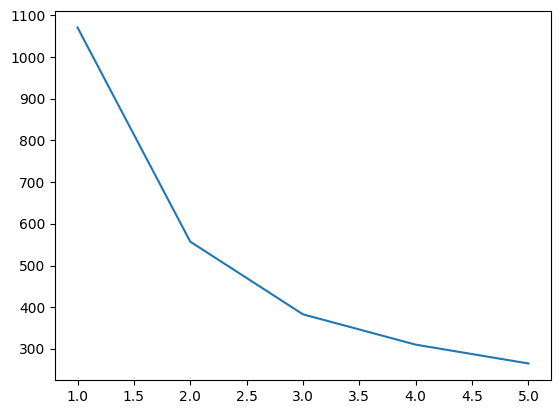

In [42]:
# You can collect data from different experiments and the plot it

data = {}
for p in [1, 2, 3, 4, 5]:
    results = netopt(num_warehouses=p,
                 objective='mindistance',
                 warehouses=warehouses,
                 customers=customers,
                 distance=distance,
                 force_open=[],
                 plot=False)
    data[p] = results['avg_weighted_distance']
    
# Plot the results
import matplotlib.pyplot as plt
plt.plot(data.keys(), data.values())